In [96]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [97]:
resamples = {'by_week': ['W-MON',4],
             'by_month': ['M',12]}

In [98]:
weather_df= pd.read_csv(os.path.join('generated_data','all_weather.csv'), header=[0,1], index_col=0)#, parse_dates=['date'])
#weather_df = weather_df.set_index('date')
weather_df.index= pd.to_datetime(weather_df.index)
weather_df[('country','World')]= weather_df.mean(axis=1)
weather_df.head()

country                                                       \
           Netherlands Philippines Singapore       Peru   Denmark     Italy   
date                                                                          
2017-01-01    1.729167   27.250000   27.4125  22.450000  5.645833  5.000000   
2017-01-02    3.208333   27.208333   26.5875  21.314286  0.875000  8.191489   
2017-01-03    5.375000   28.333333   26.3375  21.157143  3.306122  9.791667   
2017-01-04    6.145833   27.750000   26.7500  22.150000  1.958333  5.354167   
2017-01-05    0.708333   26.708333   27.9000  23.025000 -5.729167  5.729167   

                                                      ...            \
                Chile Lithuania  Slovakia  Indonesia  ...   Hungary   
date                                                  ...             
2017-01-01  25.357143    5.0750 -6.052632  31.444444  ... -6.711538   
2017-01-02  26.285714    1.1375 -4.540000  31.407407  ... -5.560000   
2017-01-03  23.785714   -1.9875  1.160000  30.115385  ... -0.354167   
2017-01-04  23.454545   -2.9125  3.345455  27.448276  ...  0.218182   
2017-01-05  26.285714  -13.5375 -1.041667  28.592593  ... -0.788462   

                                                                        \
            Argentina Poland  Bolivia  Guatemala   Honduras     Taiwan   
date                                                                     
2017-01-01  30.304348    NaN   9.2250        NaN  20.842857  22.642857   
2017-01-02  25.375000    NaN   9.7200  22.600000  20.612500  21.422222   
2017-01-03  25.533333    NaN  10.6250  19.533333  19.400000  20.509434   
2017-01-04  26.291667    NaN   8.7375  12.800000  20.325000  23.380952   
2017-01-05  24.826087    NaN   7.7250        NaN  19.950000  22.395833   

                                                
              Estonia CzechRepublic      World  
date                                            
2017-01-01   3.162500     -6.296296  11.250720  
2017-01-02  -2.175000     -3.458333  10.911742  
2017-01-03  -4.279167     -0.321429  11.447292  
2017-01-04  -8.895833      0.705882  11.365506  
2017-01-05 -12.326087     -3.437500   9.124424  

[5 rows x 54 columns]

In [99]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1882 entries, 2017-01-01 to 2022-02-25
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (country, Netherlands)        1880 non-null   float64
 1   (country, Philippines)        1878 non-null   float64
 2   (country, Singapore)          1880 non-null   float64
 3   (country, Peru)               1880 non-null   float64
 4   (country, Denmark)            1880 non-null   float64
 5   (country, Italy)              1880 non-null   float64
 6   (country, Chile)              1825 non-null   float64
 7   (country, Lithuania)          1880 non-null   float64
 8   (country, Slovakia)           1880 non-null   float64
 9   (country, Indonesia)          1706 non-null   float64
 10  (country, Norway)             1880 non-null   float64
 11  (country, Mexico)             1852 non-null   float64
 12  (country, Japan)              1880 non-null 

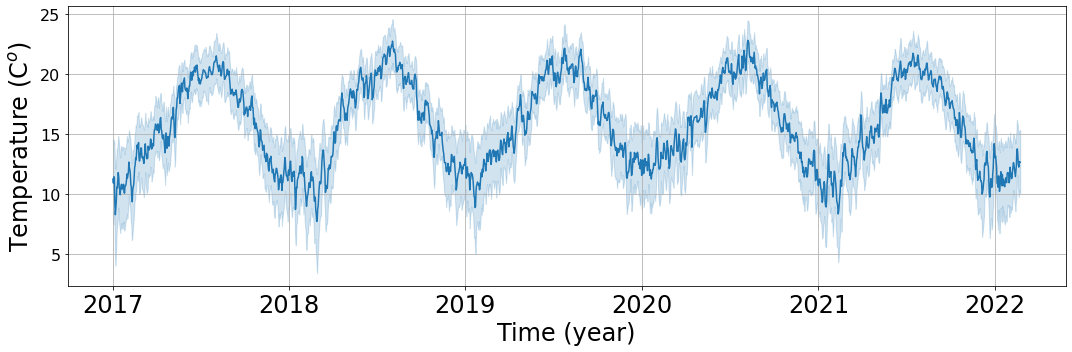

In [100]:
import seaborn as sns

plt.figure(figsize = (15,5))
plt.grid(True)

plt.xlabel("Time (year)", fontsize = 24)
plt.ylabel('Temperature (C$^o$)', fontsize = 24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=16)

sns.lineplot(data=weather_df.iloc[:-2]);

#hide legend
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.savefig(os.path.join('figs','global_temperature.png'),bbox_inches='tight')

### Read songs' features

In [101]:
mood_features= 'danceability valence energy'.split()

In [102]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])

In [103]:
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [104]:
ranking_features_df['Region'].unique()

array(['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
       'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
       'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
       'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
       'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
       'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
       'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
       'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
       'DominicanRepublic', 'UnitedKingdom', 'World', 'Paraguay',
       'Australia', 'Latvia', 'Greece', 'HongKong', 'Luxemborg'],
      dtype=object)

### Remove Christmas carols as we consider them outliers

In [105]:
christmas_songs_df= ranking_features_df[(((ranking_features_df['Date'].dt.month==12) &
                                        (ranking_features_df['Date'].dt.day>=23)) |
                                        ((ranking_features_df['Date'].dt.month==1) & 
                                        (ranking_features_df['Date'].dt.day<=1)))& 
                                        (ranking_features_df['danceability']<=0.64) &
                                       (ranking_features_df['energy']<=0.60) &
                                       (ranking_features_df['valence']>=0.56)]
outliers_names= christmas_songs_df['Track Name'].unique()                    

In [106]:
clean_ranking_features_df= ranking_features_df[~ranking_features_df['Track Name'].isin(outliers_names)]

In [107]:
clean_ranking_features_df.shape, ranking_features_df.shape

((18356947, 13), (18749500, 13))

In [108]:
clean_ranking_features_df['Date'].min(), clean_ranking_features_df['Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-02-22 00:00:00'))

In [109]:
def plot_weather_and_song_features(song_feat_df, weather_df, country, features):
    country_weather_ts= weather_df[('country',country)]
    
    country_df = clean_ranking_features_df[clean_ranking_features_df['Region']==country]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, axes = plt.subplots(len(features), 1, figsize=(20,15), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        df = daily_country_df[c].to_frame()
        df['weather']= country_weather_ts
       
        ax2 = axe[i].twinx()
                                     
        corr_= df.dropna().corr().loc[c,'weather']                             
                                     
        df[c].plot(ax=axe[i], color='blue', title=f'Country: {country}. Feature: {c}. Corr: {corr_}');
        df['weather'].plot(ax=ax2, grid=True, color='red');  
        
        i= i+1
                                     

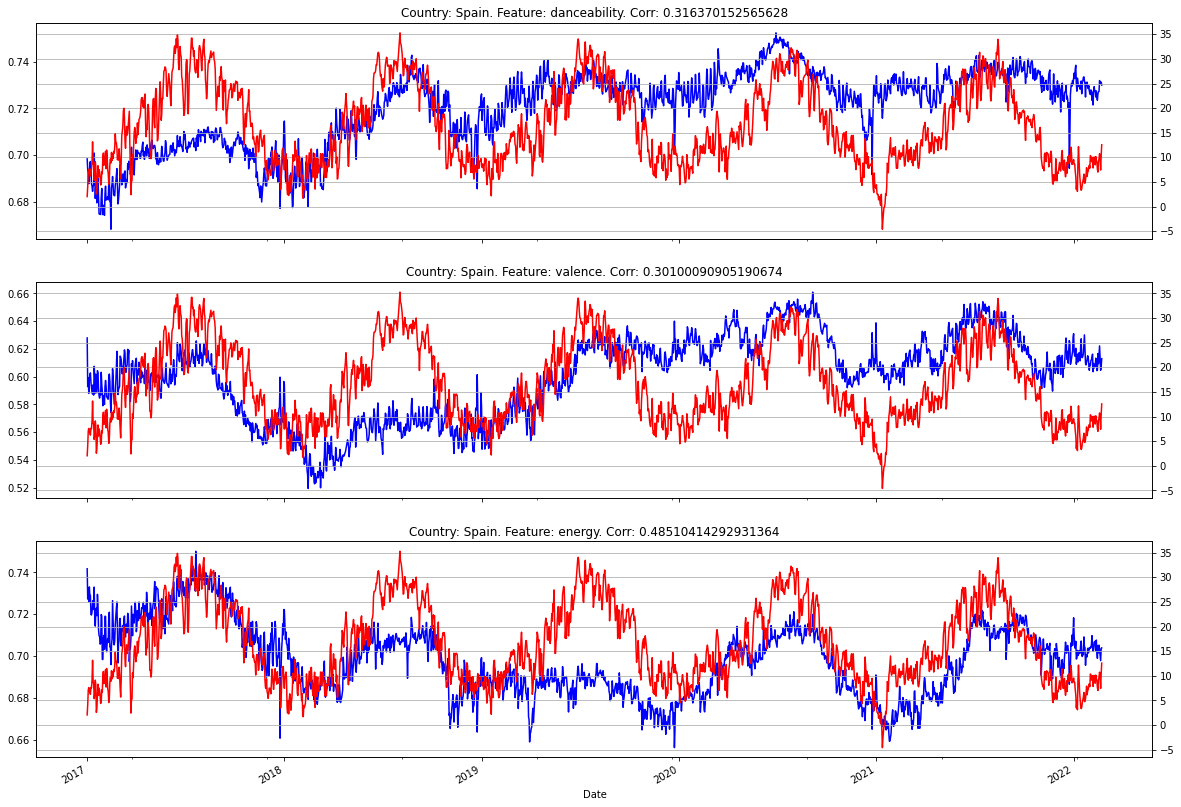

In [110]:
plot_weather_and_song_features(clean_ranking_features_df, weather_df, 'Spain', mood_features)

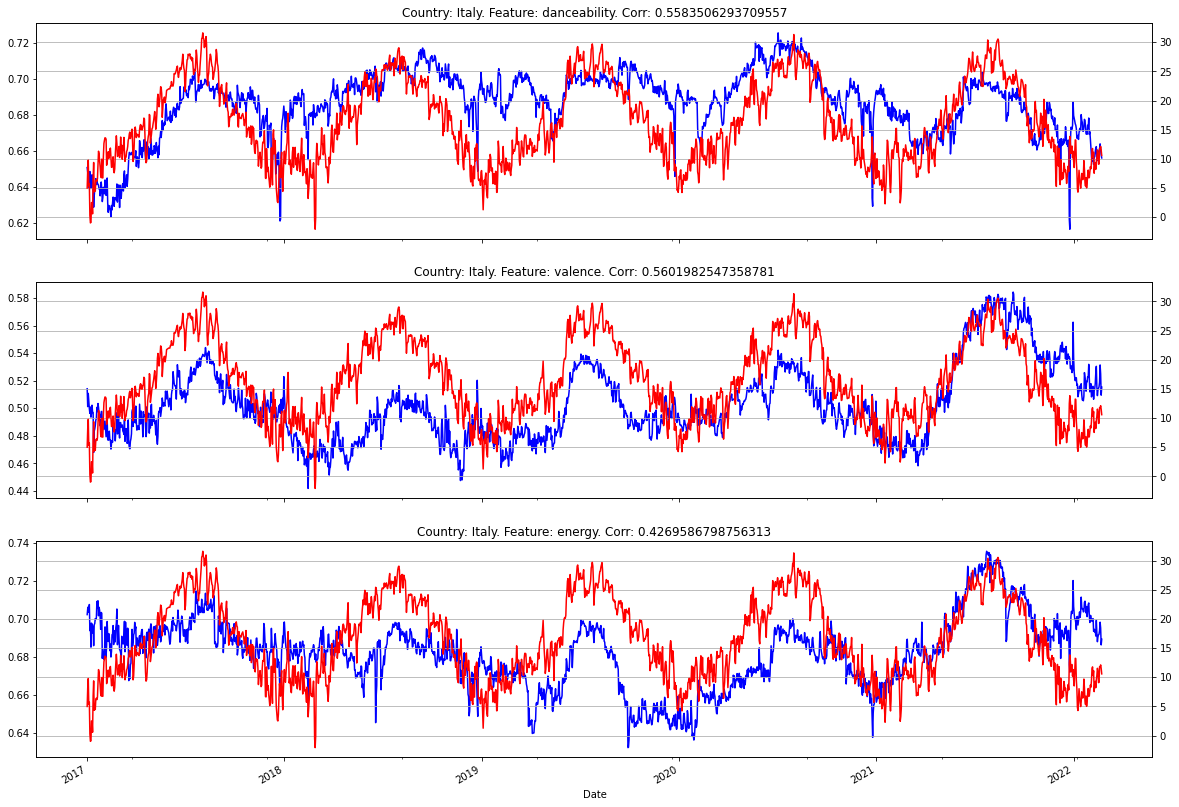

In [111]:
plot_weather_and_song_features(clean_ranking_features_df, weather_df, 'Italy', mood_features)

## Correlation study

In [112]:
def compute_corelations(song_feat_df, weather_df, features):

    corr_dict = []

    for c in tqdm(song_feat_df['Region'].unique(), desc='Country'):
        try:
            f_dict= {} 
            f_dict['country']=c

            country_weather_ts= weather_df[('country',c)]  

            country_df = song_feat_df[song_feat_df['Region']==c]
            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            for f in features:      

                df = daily_country_df[f].to_frame()
                df['weather']=country_weather_ts
                df= df.dropna(axis=0)
                #print(df)
                mis_= mutual_info_regression(df['weather'].to_numpy().reshape(-1,1),df[f].to_numpy().reshape(-1,1))


                corr_= df.dropna().corr().loc[f,'weather']                             
                f_dict[f'pcc_{f}']= corr_
                f_dict[f'mis_{f}']= mis_[0]

            corr_dict.append(f_dict)
        except:
            print(f"No correlation for: {c}")
    
    return pd.DataFrame(corr_dict)
        
all_corr_df= compute_corelations(clean_ranking_features_df, weather_df, mood_features)        

Country:   0%|          | 0/54 [00:00<?, ?it/s]

No correlation for: Poland


In [113]:
all_corr_df.describe()

,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.188980,0.103510,0.211298,0.099355,0.218351,0.114273
std,0.174197,0.069136,0.172942,0.070505,0.158043,0.062124
min,-0.307285,0.000000,-0.314891,0.000000,-0.200360,0.000000
25%,0.064708,0.052504,0.101077,0.052328,0.134145,0.065600
50%,0.202393,0.090847,0.216913,0.087358,0.250471,0.109312
75%,0.332129,0.141400,0.318049,0.131256,0.324726,0.155590
max,0.558351,0.319867,0.607975,0.337528,0.501636,0.243592


PCC

In [114]:
all_corr_df.sort_values(by='pcc_danceability', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
28,Turkey,0.446083,0.196249,0.363622,0.168260,0.304742,0.190738
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599
26,Taiwan,0.405552,0.102998,0.327882,0.122530,0.190914,0.073892
36,Denmark,0.397867,0.224880,0.324369,0.106295,0.473339,0.167917
24,Lithuania,0.391914,0.150674,0.183842,0.173042,0.195977,0.152950
35,Switzerland,0.386779,0.127091,0.339116,0.114356,0.340475,0.107490
6,Estonia,0.368694,0.156764,0.190712,0.092371,0.218731,0.155590
16,Belgium,0.347923,0.102622,0.387156,0.100044,0.354084,0.151800


In [115]:
all_corr_df.sort_values(by='pcc_valence', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
39,Sweden,0.346164,0.141400,0.516055,0.204250,0.385760,0.174745
21,France,0.345988,0.135184,0.415609,0.140132,0.296803,0.109312
41,Netherlands,0.332129,0.147511,0.405757,0.189058,0.309427,0.205701
16,Belgium,0.347923,0.102622,0.387156,0.100044,0.354084,0.151800
28,Turkey,0.446083,0.196249,0.363622,0.168260,0.304742,0.190738
50,Greece,0.242176,0.131656,0.362378,0.161010,0.324693,0.177582
1,Portugal,0.246029,0.059087,0.352729,0.129780,0.259551,0.208764


In [116]:
all_corr_df.sort_values(by='pcc_energy', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
8,Spain,0.316370,0.196314,0.301001,0.148797,0.485104,0.217482
36,Denmark,0.397867,0.224880,0.324369,0.106295,0.473339,0.167917
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
7,Hungary,0.108993,0.114642,0.266246,0.099721,0.395369,0.148896
39,Sweden,0.346164,0.141400,0.516055,0.204250,0.385760,0.174745
40,CzechRepublic,0.120757,0.083227,0.282468,0.097584,0.374541,0.202107
15,Canada,0.222108,0.109871,0.235401,0.111123,0.372057,0.194685
10,Slovakia,0.347597,0.109329,0.293746,0.131256,0.363035,0.162980
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599


Mutual info score

In [117]:
all_corr_df.sort_values(by='mis_danceability', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
36,Denmark,0.397867,0.224880,0.324369,0.106295,0.473339,0.167917
4,Germany,0.293471,0.218954,0.125233,0.069668,0.285643,0.121161
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599
9,Peru,-0.103712,0.203914,-0.125115,0.094804,0.188311,0.110487
8,Spain,0.316370,0.196314,0.301001,0.148797,0.485104,0.217482
28,Turkey,0.446083,0.196249,0.363622,0.168260,0.304742,0.190738
46,World,0.237289,0.178897,0.136811,0.074442,0.164854,0.114413
6,Estonia,0.368694,0.156764,0.190712,0.092371,0.218731,0.155590


In [118]:
all_corr_df.sort_values(by='mis_valence', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
39,Sweden,0.346164,0.141400,0.516055,0.204250,0.385760,0.174745
41,Netherlands,0.332129,0.147511,0.405757,0.189058,0.309427,0.205701
24,Lithuania,0.391914,0.150674,0.183842,0.173042,0.195977,0.152950
28,Turkey,0.446083,0.196249,0.363622,0.168260,0.304742,0.190738
32,Japan,0.119322,0.143454,0.188306,0.164782,0.250471,0.142183
50,Greece,0.242176,0.131656,0.362378,0.161010,0.324693,0.177582
8,Spain,0.316370,0.196314,0.301001,0.148797,0.485104,0.217482


In [119]:
all_corr_df.sort_values(by='mis_energy', ascending=False)

,country,pcc_danceability,mis_danceability,pcc_valence,mis_valence,pcc_energy,mis_energy
3,Italy,0.558351,0.319867,0.560198,0.337528,0.426959,0.243592
5,Finland,0.408429,0.209986,0.607975,0.302184,0.362233,0.222599
8,Spain,0.316370,0.196314,0.301001,0.148797,0.485104,0.217482
23,Norway,0.451329,0.226436,0.573091,0.256291,0.501636,0.213974
1,Portugal,0.246029,0.059087,0.352729,0.129780,0.259551,0.208764
41,Netherlands,0.332129,0.147511,0.405757,0.189058,0.309427,0.205701
40,CzechRepublic,0.120757,0.083227,0.282468,0.097584,0.374541,0.202107
15,Canada,0.222108,0.109871,0.235401,0.111123,0.372057,0.194685
28,Turkey,0.446083,0.196249,0.363622,0.168260,0.304742,0.190738
50,Greece,0.242176,0.131656,0.362378,0.161010,0.324693,0.177582


## Correlation based on trend

In [120]:
def compute_trend_based_correlations(song_feat_df, weather_df, features, resample):

    corr_dict = []

    for c in tqdm(song_feat_df['Region'].unique(), desc='Country'):
        try:
            f_dict= {} 
            f_dict['country']=c

            country_weather_ts= weather_df[('country',c)].fillna(method='ffill')
            #country_weather_ts= country_weather_ts.resample(resample[0]).mean()
            #print(country_weather_ts)
            weather_decomposition = seasonal_decompose(country_weather_ts, model='additive', period=7);


            country_df = song_feat_df[song_feat_df['Region']==c]
            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            for f in features:      

                country_f_decomposition = seasonal_decompose(daily_country_df[f], model='additive', period=7);

                df = country_f_decomposition.trend.to_frame()
                df['weather']=weather_decomposition.trend
                
                corr_= df.dropna().corr().loc['trend','weather']   
                
                f_dict[f'pcc_{f}']= corr_
                
            corr_dict.append(f_dict)
        except:
            print(f"No trend-based correlation study for: {c}")
    
    df=  pd.DataFrame(corr_dict)
    df = df.set_index('country')
    return df
        
all_trend_corr_df= compute_trend_based_correlations(clean_ranking_features_df, weather_df, mood_features, resamples['by_month'])   

Country:   0%|          | 0/54 [00:00<?, ?it/s]

No trend-based correlation study for: Turkey
No trend-based correlation study for: Guatemala
No trend-based correlation study for: Poland
No trend-based correlation study for: Columbia


In [121]:
all_trend_corr_desc= all_trend_corr_df.describe()
all_trend_corr_desc

,pcc_danceability,pcc_valence,pcc_energy
count,50.000000,50.000000,50.000000
mean,0.205294,0.235905,0.249855
std,0.202675,0.199576,0.179781
min,-0.399116,-0.417118,-0.249852
25%,0.071051,0.113347,0.170576
50%,0.242228,0.251817,0.278314
75%,0.385510,0.361990,0.382421
max,0.590057,0.680671,0.545602


In [122]:
all_trend_corr_df.sort_values(by='pcc_danceability', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Italy,0.590057,0.584478,0.454620
Norway,0.485947,0.634627,0.541761
Finland,0.465354,0.680671,0.406053
Taiwan,0.458112,0.366324,0.220254
Lithuania,0.433719,0.200777,0.216306
Switzerland,0.433558,0.373882,0.374899
Denmark,0.425310,0.355673,0.545602
Estonia,0.412620,0.201435,0.237089
Mexico,0.405726,0.364096,-0.120424


In [123]:
all_trend_corr_df.sort_values(by='pcc_valence', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Finland,0.465354,0.680671,0.406053
Norway,0.485947,0.634627,0.541761
Italy,0.590057,0.584478,0.454620
Sweden,0.393261,0.561022,0.415708
Netherlands,0.362255,0.471841,0.340378
France,0.400407,0.461978,0.339819
Belgium,0.399214,0.430471,0.388171
DominicanRepublic,0.289014,0.398294,0.243874
Greece,0.257925,0.384944,0.356412


In [124]:
all_trend_corr_df.sort_values(by='pcc_energy', ascending=False)

,pcc_danceability,pcc_valence,pcc_energy
country,,,
Denmark,0.425310,0.355673,0.545602
Norway,0.485947,0.634627,0.541761
Spain,0.333781,0.316588,0.522299
Italy,0.590057,0.584478,0.454620
Hungary,0.124100,0.287937,0.447229
CzechRepublic,0.154316,0.302132,0.437975
Canada,0.248188,0.264499,0.428793
Sweden,0.393261,0.561022,0.415708
Ecuador,-0.399116,-0.417118,0.408130


In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def calculate_n_clusters(X):
    range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        if X.shape[1]> 1:
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(
                X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            )

            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(
                centers[:, 0],
                centers[:, 1],
                marker="o",
                c="white",
                alpha=1,
                s=200,
                edgecolor="k",
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


def plot_weather_and_song_feature(song_feat_df, weather_df, country, feature):
    country_weather_ts= weather_df[('country',country)]
    
    country_df = song_feat_df[song_feat_df['Region']==country]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, ax = plt.subplots(1, 1, figsize=(10,4), sharey='row', sharex='col')
    df = daily_country_df[feature].to_frame()
    df['weather']= country_weather_ts
       
    ax2 = ax.twinx()
    
    ax.set_xlabel('Time (year)', fontsize=16)
    ax.set_ylabel(f'{feature}', fontsize=16, color='blue')
    ax.tick_params(axis='y', colors='blue')
    

    ax2.set_ylabel('Temperature (C$^o$)', fontsize=16, color='red')    
    ax2.tick_params(axis='y', colors='red')
    
    df[feature].plot(ax=ax, color='blue');
    df['weather'].plot(ax=ax2, grid=True, color='red');
    plt.tight_layout()
    plt.savefig(os.path.join('figs',f'weather_vs_{feature}_{country}.png'))
    

### Danceability

For n_clusters = 2 The average silhouette_score is : 0.6184403702450847
For n_clusters = 3 The average silhouette_score is : 0.5394377089987461
For n_clusters = 4 The average silhouette_score is : 0.5823269478799321
For n_clusters = 5 The average silhouette_score is : 0.6002714773492349
For n_clusters = 6 The average silhouette_score is : 0.5669592260468405
For n_clusters = 8 The average silhouette_score is : 0.5524622984975095
For n_clusters = 10 The average silhouette_score is : 0.5494510000321127
For n_clusters = 15 The average silhouette_score is : 0.5917490721998688
For n_clusters = 20 The average silhouette_score is : 0.620128769059008
For n_clusters = 25 The average silhouette_score is : 0.5434477246707307
For n_clusters = 30 The average silhouette_score is : 0.49915858783503575


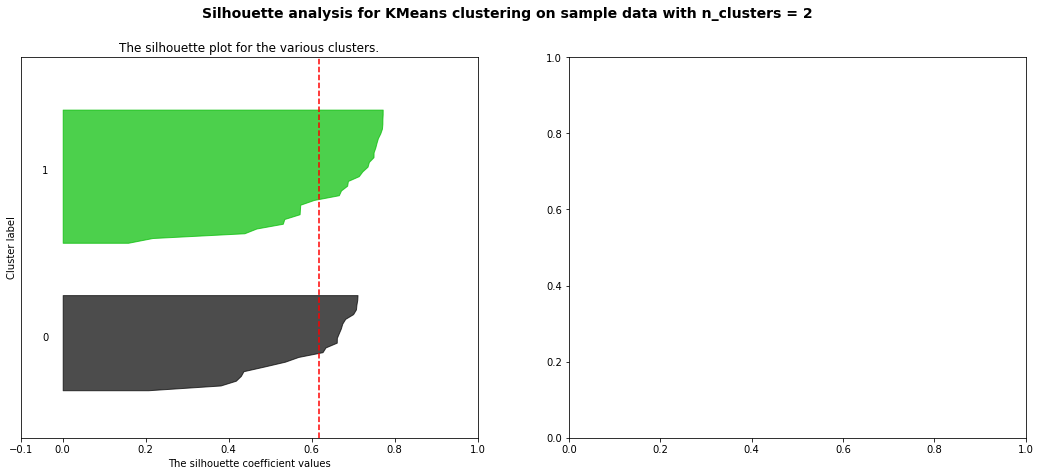

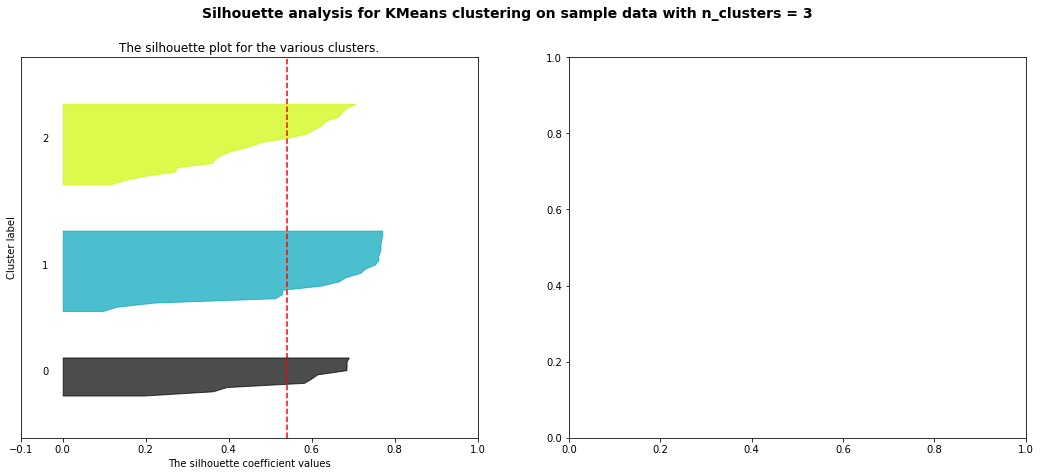

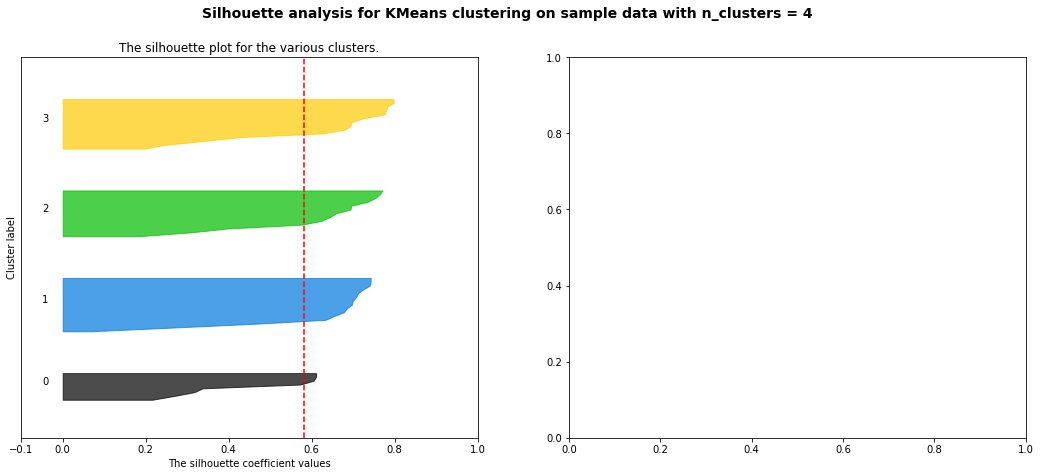

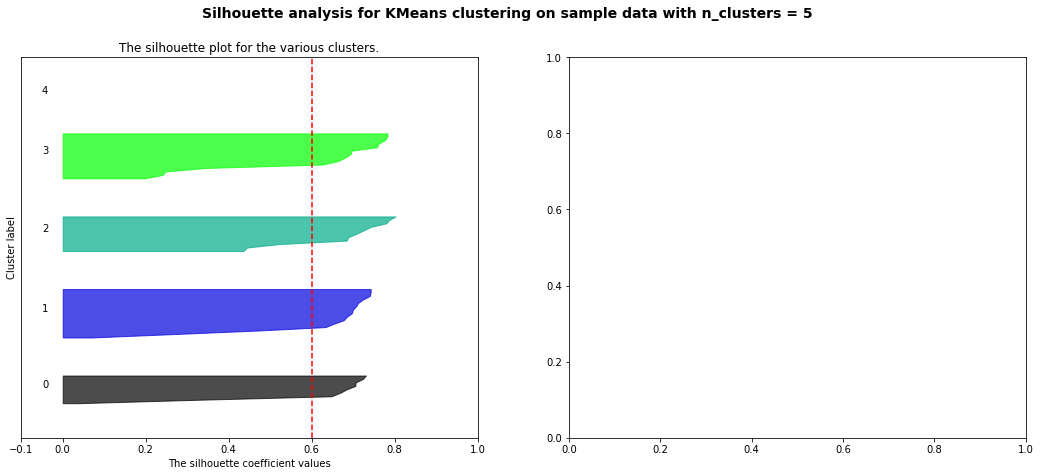

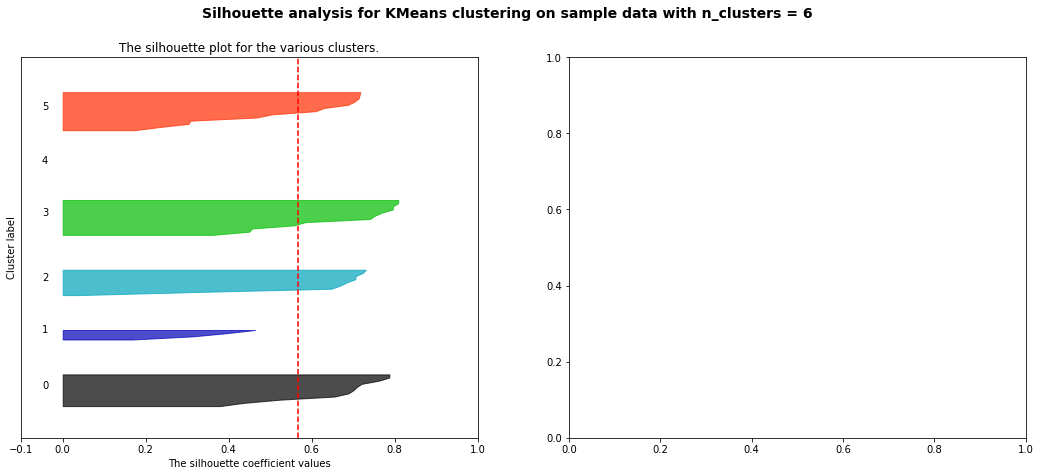

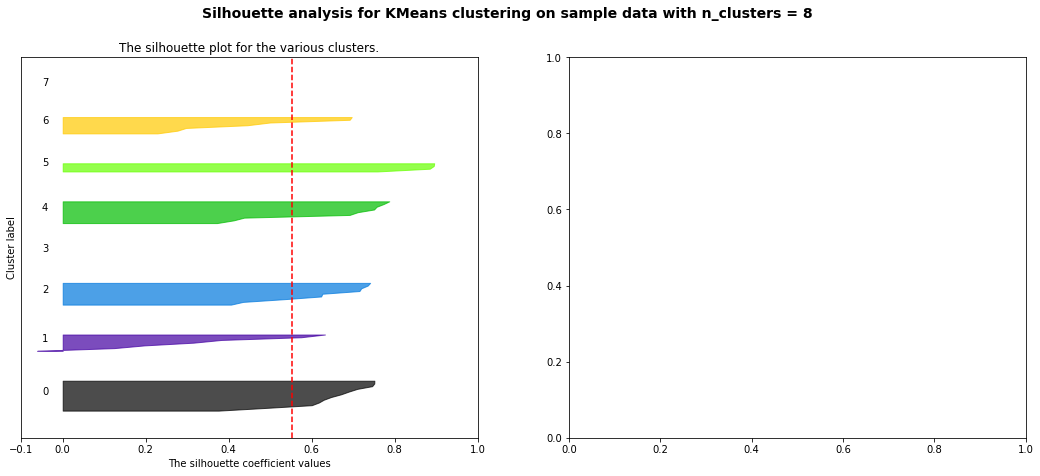

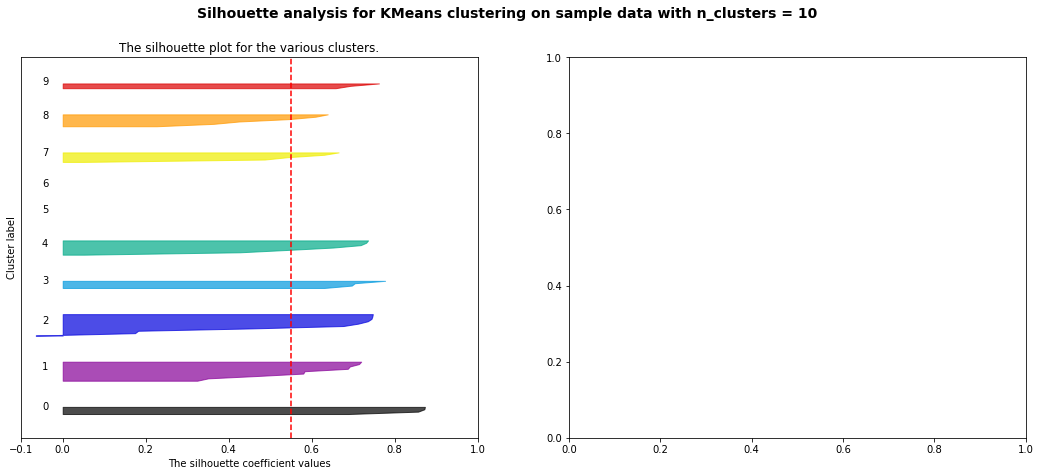

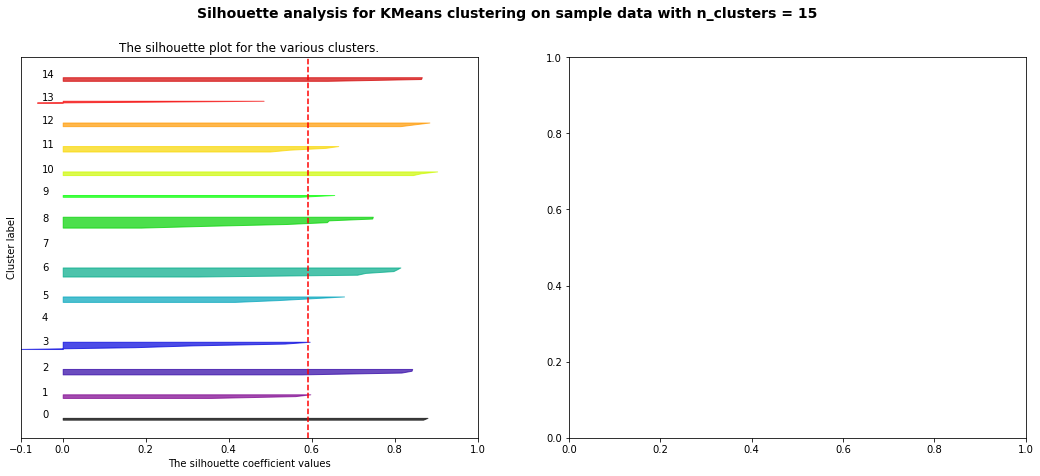

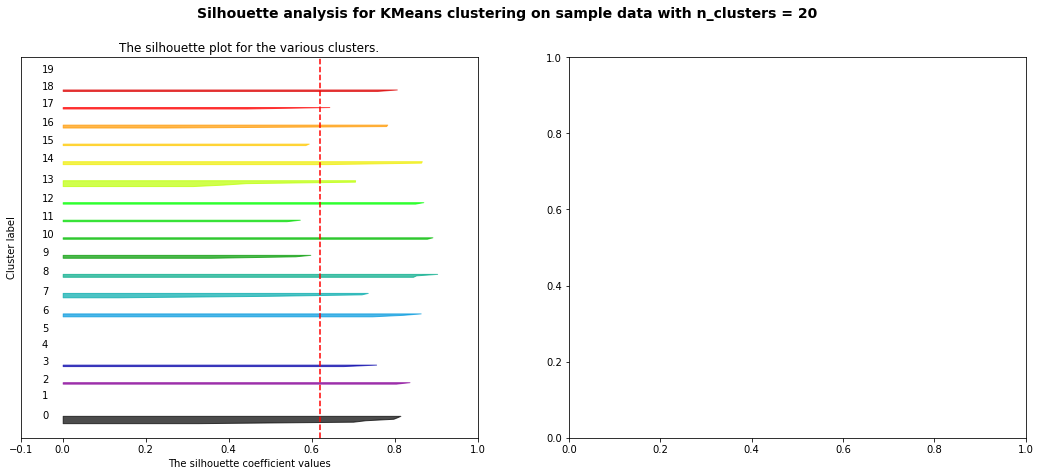

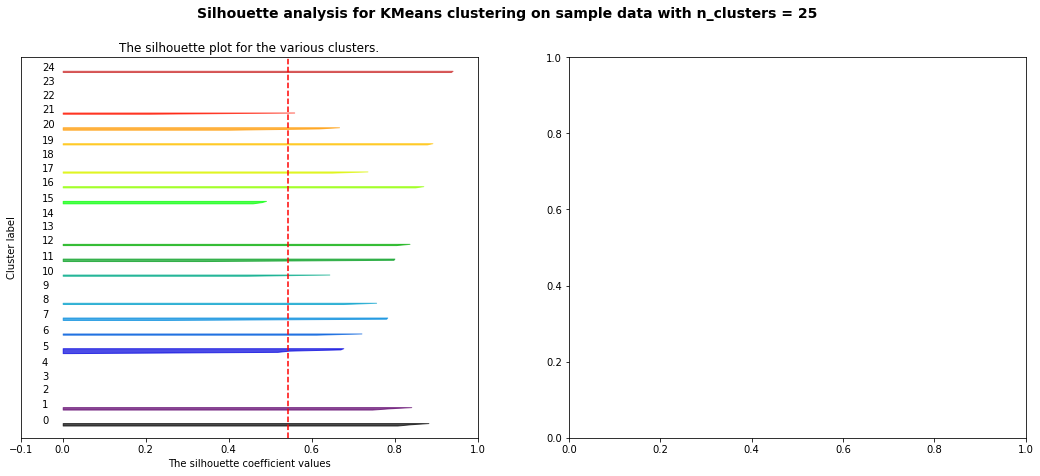

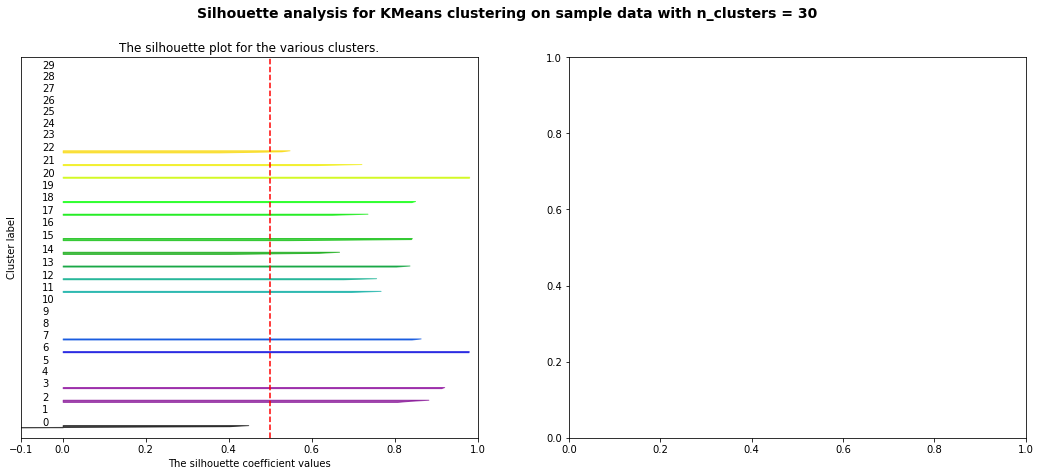

In [126]:
calculate_n_clusters(all_trend_corr_df['pcc_danceability'].values.reshape(-1,1))    

In [127]:
clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_danceability'].values.reshape(-1,1))

In [128]:
all_trend_corr_df['danceability_clust']= cluster_labels

In [129]:
color_dict = {0: 'purple', 1: 'red', 2: 'blue', 3: 'green', 4:'cyan', 5:'orange',
              6:'brown',7:'pink',8:'gray',9:'olive',10:'yellow',11:'black',
              12:'lightcoral', 13:'palegreen', 14:'navajowhite', 15:'slateblue', 16:'mediumorchid', 17:'darkgoldenrod',
              18:'teal', 19:'steelblue', 20:'silver'}

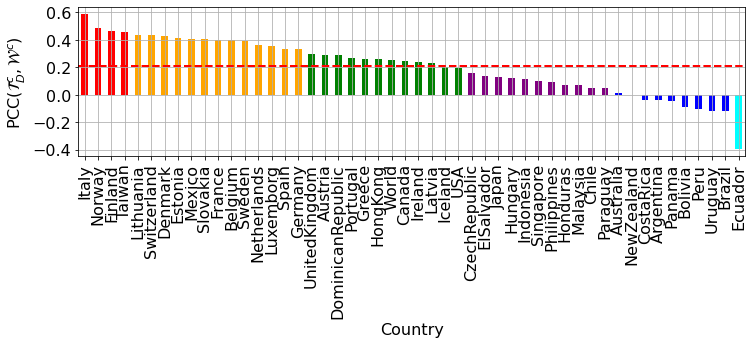

In [130]:
colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_danceability',ascending=False)['danceability_clust']]
all_trend_corr_df['pcc_danceability'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_D, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_danceability'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_danceability.png'))

In [ ]:
plot_weather_and_song_feature(clean_ranking_features_df, weather_df, 'Italy', 'danceability')

### Valence

In [ ]:
calculate_n_clusters(all_trend_corr_df['pcc_valence'].values.reshape(-1,1))    

In [ ]:
clusterer = KMeans(n_clusters=6, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_valence'].values.reshape(-1,1))
all_trend_corr_df['valence_clust']= cluster_labels

colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_valence',ascending=False)['valence_clust']]
all_trend_corr_df['pcc_valence'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_V, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_valence'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_valence.png'))

In [ ]:
plot_weather_and_song_feature(clean_ranking_features_df, weather_df, 'Italy', 'danceability')

### Energy

In [ ]:
calculate_n_clusters(all_trend_corr_df['pcc_energy'].values.reshape(-1,1))    

In [ ]:
clusterer = KMeans(n_clusters=20, random_state=10)
cluster_labels = clusterer.fit_predict(all_trend_corr_df['pcc_energy'].values.reshape(-1,1))
all_trend_corr_df['energy_clust']= cluster_labels

colors_to_plot= [color_dict[i] for i in all_trend_corr_df.sort_values(by='pcc_energy',ascending=False)['energy_clust']]
all_trend_corr_df['pcc_energy'].sort_values(ascending=False).plot(kind='bar', 
                                                                        grid=True, 
                                                                        figsize=(10,4),
                                                                        color=colors_to_plot);
plt.tight_layout()
plt.xlabel("Country", fontsize = 16)
plt.ylabel('PCC($\mathcal{T}^c_E, \mathcal{W}^c$)', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=all_trend_corr_desc.loc['mean', 'pcc_energy'], color='r', linestyle='--', lw=2)

plt.savefig(os.path.join('figs','pcc_weather_energy.png'))

In [ ]:
plot_weather_and_song_feature(clean_ranking_features_df, weather_df, 'Australia', 'energy')

### Plot as maps

In [ ]:
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#correct some name inconsistences
world.loc[4,'name']='USA'
world.loc[143,'name']='UnitedKingdom'
world.loc[17,'name']='DominicanRepublic'
world.loc[153,'name']='CzechRepublic'
world.loc[37,'name']='ElSalvador'
world.loc[136,'name']='NewZealand'
world.loc[34,'name']='CostaRica'
world.loc[128,'name']='Luxemborg'

world.head()

In [ ]:
world_with_values= world.merge(all_trend_corr_df.reset_index(), left_on='name', right_on='country')

In [ ]:
# normalize color
vmin, vmax, vcenter = world_with_values.pcc_danceability.min(), world_with_values.pcc_danceability.max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'coolwarm'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

In [ ]:
ax=world_with_values.plot(column='pcc_danceability', legend=True, figsize=(15,7), cmap=cmap,norm=norm, legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_weather_danceability_map_v2.png'))

In [ ]:
vmin, vmax, vcenter = world_with_values.pcc_valence.min(), world_with_values.pcc_valence.max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

ax=world_with_values.plot(column='pcc_valence', legend=True, figsize=(15,7), cmap=cmap, norm=norm,legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout();
plt.savefig(os.path.join('figs','pcc_weather_valence_map_v2.png'))

In [ ]:
vmin, vmax, vcenter = world_with_values.pcc_energy.min(), world_with_values.pcc_energy.max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

ax=world_with_values.plot(column='pcc_energy', legend=True, figsize=(15,7),cmap=cmap,norm=norm, legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_weather_energy_map_v2.png'))